# Library Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.metrics import Precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Processing

In [2]:
batch_size = 20
epochs=20
class_num=2
train_data, val_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/retina-blood-vessel/Data/train', batch_size=batch_size, validation_split=0.2, subset="both", shuffle=True, seed=123)
test_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/retina-blood-vessel/Data/test', batch_size=10)

Found 160 files belonging to 2 classes.
Using 128 files for training.
Using 32 files for validation.
Found 40 files belonging to 2 classes.


# Building The Model

In [3]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(256, 256, 3), batch_size=batch_size),
    
    layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', padding="same"),
    layers.MaxPool2D(pool_size=(3,3)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', padding="same"),
    layers.MaxPool2D(pool_size=(3,3)),
    layers.BatchNormalization(),
     
    layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', padding="same"),
    layers.MaxPool2D(pool_size=(3,3)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', padding="same"),
    layers.MaxPool2D(pool_size=(3,3)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding="same"),
    layers.MaxPool2D(pool_size=(3,3)),
    layers.BatchNormalization(),
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(batch_size*3, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(batch_size*2, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(batch_size, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(class_num, activation="softmax")
    ])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (20, 256, 256, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (20, 85, 85, 32)          0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (20, 85, 85, 32)          128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (20, 85, 85, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (20, 28, 28, 64)          0         
 g2D)                                                            
                                                        

In [4]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training The Model

In [5]:
history = model.fit(train_data, epochs=epochs, validation_data=val_data, shuffle=True)

Epoch 1/20
7/7 [==============================] - 10s 753ms/step - loss: 0.4437 - accuracy: 0.8203 - val_loss: 0.9445 - val_accuracy: 0.6250
Epoch 2/20
7/7 [==============================] - 5s 672ms/step - loss: 0.1429 - accuracy: 0.9688 - val_loss: 1.0468 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 5s 664ms/step - loss: 0.0886 - accuracy: 0.9844 - val_loss: 1.2923 - val_accuracy: 0.6250
Epoch 4/20
7/7 [==============================] - 5s 666ms/step - loss: 0.1091 - accuracy: 0.9844 - val_loss: 1.2885 - val_accuracy: 0.6250
Epoch 5/20
7/7 [==============================] - 5s 672ms/step - loss: 0.0740 - accuracy: 0.9922 - val_loss: 0.9966 - val_accuracy: 0.6250
Epoch 6/20
7/7 [==============================] - 5s 667ms/step - loss: 0.0606 - accuracy: 0.9844 - val_loss: 0.6857 - val_accuracy: 0.6250
Epoch 7/20
7/7 [==============================] - 5s 673ms/step - loss: 0.0587 - accuracy: 0.9844 - val_loss: 0.3968 - val_accuracy: 0.8125
Epoch 8/20
7/7 [===

# Visualizing Model Performance

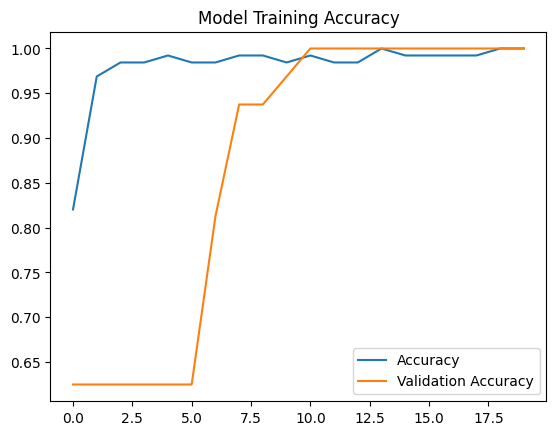

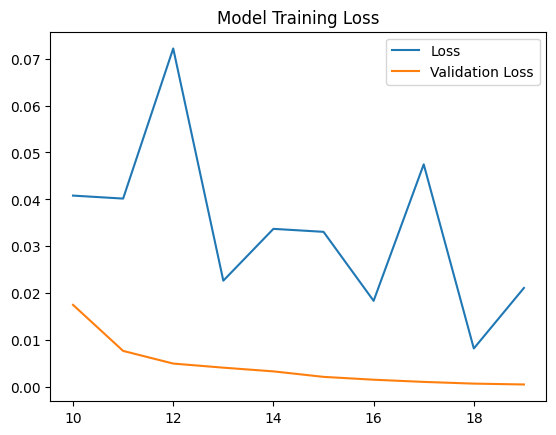

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), history.history['accuracy'], label='Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Accuracy')
plt.legend()
plt.show()

plt.plot(range(10, epochs), history.history['loss'][10:], label='Loss')
plt.plot(range(10, epochs), history.history['val_loss'][10:], label='Validation Loss')
plt.title('Model Training Loss')
plt.legend()
plt.show()


In [7]:
results = model.evaluate(test_data)

4/4 [==============================] - 1s 103ms/step - loss: 5.0258e-04 - accuracy: 1.0000


Model has a 100% accuracy on test data.